# Machine Learning on Boston Housing Dataset

This data was originally a part of UCI Machine Learning Repository and has been removed now. This data also ships with the scikit-learn library. 
There are 506 samples and 13 feature variables in this data-set. The objective is to predict the value of prices of the house using the given features.

The description of all the features is given below:

  **CRIM**: Per capita crime rate by town

  **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft

  **INDUS**: Proportion of non-retail business acres per town

  **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

  **NOX**: Nitric oxide concentration (parts per 10 million)

  **RM**: Average number of rooms per dwelling

  **AGE**: Proportion of owner-occupied units built prior to 1940

  **DIS**: Weighted distances to five Boston employment centers

  **RAD**: Index of accessibility to radial highways

  **TAX**: Full-value property tax rate per $10,000

  **B**: 1000(Bk - 0.63)², where Bk is the proportion of [people of African American descent] by town

  **LSTAT**: Percentage of lower status of the population

  **MEDV**: Median value of owner-occupied homes in $1000s




I**mport the required Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

**Load the Boston Housing DataSet from scikit-learn**

In [2]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

# boston_dataset is a dictionary
# let's check what it contains
boston_dataset.keys()

['filename', 'data', 'target', 'DESCR', 'feature_names']

**Load the data into pandas dataframe**

In [3]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


**The target values is missing from the data. Create a new column of target values and add it to dataframe**

In [4]:
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 1. Data understanding and preprocessing - Check if any of the feature variables have null values - 50 pts

**1.0 Check for missing values** - 10 pts

In [14]:
# check for missing values in all the columns
boston.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

**1.1. Data Visualization** - Plot histogram for median housing prices - 15 pts

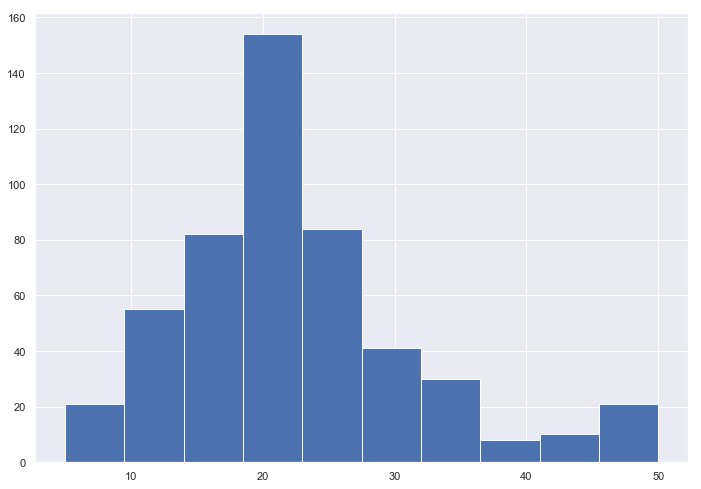

In [16]:
# set the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)})

# plot a histogram showing the distribution of the target values
boston.MEDV.hist()

**1.2. Correlation matrix** - Check if there is any corelation between the variables of the features. Present observations - 25 pts

In [17]:
# compute the pair wise correlation for all columns  
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


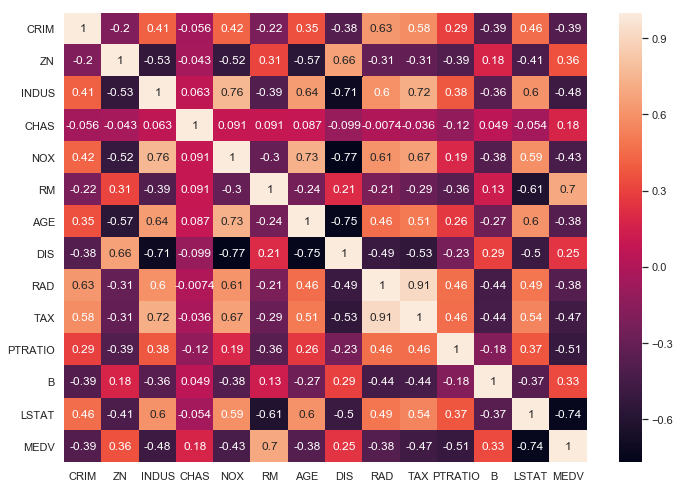

In [18]:
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square. Use sns.heatmap

sns.heatmap(boston.corr(), annot=True)

**Observations**
- Describe the observations from the heatmap. Talk about relationships between variables  
  Chas has very little correlation with any other variable, while most of the other variables  
  have have close to +-0.5 correlations with the other variables.  
  There is a stronger positive correlation between indus and tax which indicates a positive relationship between industry and property tax  
  There is a stronger negative correlation between age and dis, which indicates that age and distance from employment have a negative relationship




**Confirm Corelations** - Show corelations between median value and 2-3 other variables using a scatter plot

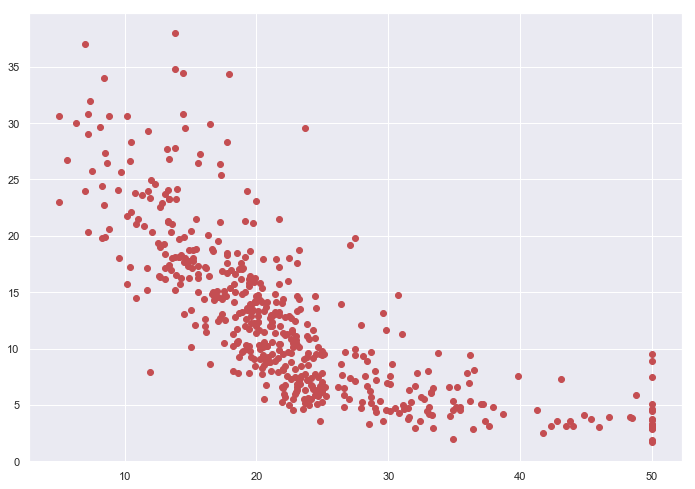

In [89]:
plt.scatter(boston.MEDV, boston.LSTAT, c='r')

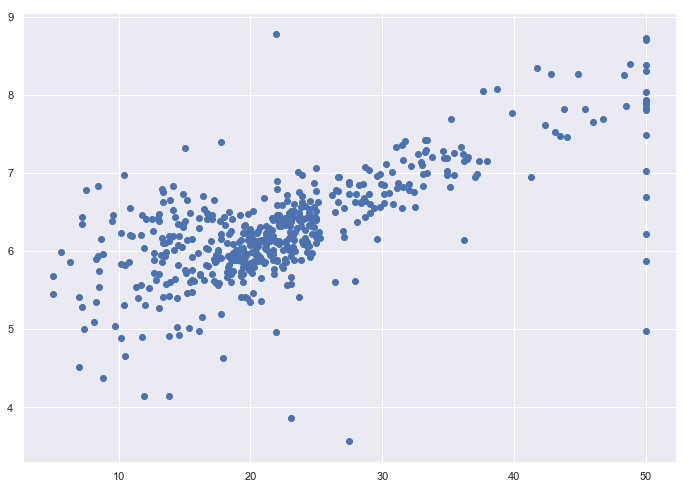

In [90]:
plt.scatter(boston.MEDV, boston.RM)

### 2. Create an Basic Linear Regression model using Sci-Kit (sklearn) - 35 pts

**2.0 Prepare the data for training** - 5 pts

In [184]:
X = boston.drop('MEDV',axis=1)
Y = boston.MEDV

TypeError: unhashable type

**2.1 Create Validation Data** - Split the data into training and testing sets - 5pts

In [111]:
from sklearn.model_selection import train_test_split

# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, random_state=100)

**2.2. Train the model using sklearn LinearRegression** - 5 pts

In [158]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(normalize=True)
model.fit(Xtrain,Ytrain)

y_pred = model.predict(Xtest)

**2.3 Evaluate model** - Use R2 and RMSE scores for the training and validation data - 10 pts

In [160]:
# model evaluation for training set
print(model.score(Xtrain,Ytrain))
print
# model evaluation for testing set
print(model.score(Xtest,Ytest))
print
# root mean square error of the model
from sklearn.metrics import mean_squared_error
print("RMS: " + str(mean_squared_error(Ytest, y_pred)))

# r-squared score of the model
from sklearn.metrics import r2_score
print("R2: " + str(r2_score(Ytest, y_pred)))

0.7421573768304615

0.7246154314616731

RMS: 27.173144173043667
R2: 0.7246154314616732


**2.4 Plot the Linear Regression Model** - 10 pts 

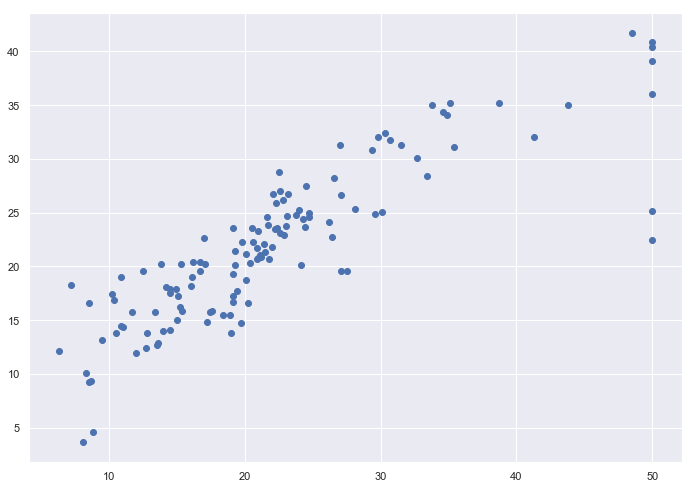

In [185]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(Ytest,y_pred)

## 3. Effect of Dimensionality - Evaluate the Effect of Dimensionality Reduction - 35 pts

**3.0 Dimensionality  Reduction** - Test number of components 2 - 12 for PCA - 15 pts

In [187]:
# instantiate PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [188]:
#create new X and Y
X = boston.drop('MEDV',axis=1)
Y = boston.MEDV

In [191]:
#fit pca
pmodel = pca.fit(X,Y)

array([[ 2.92973218e-02, -4.35898000e-02,  2.83309382e-02,
        -5.55846350e-05,  4.49721818e-04, -1.16815860e-03,
         8.36335746e-02, -6.56163360e-03,  4.50053753e-02,
         9.49741169e-01,  5.60011721e-03, -2.91218514e-01,
         2.29433756e-02],
       [ 6.66847277e-03,  1.17564821e-03, -4.94975624e-03,
        -1.02678850e-04,  1.82069867e-06,  3.65750108e-04,
        -5.72246652e-03,  3.53685109e-04, -8.61865948e-03,
        -2.92406308e-01, -2.52898538e-03, -9.56180551e-01,
         5.76719865e-03]])

**3.1 Transform original data to the PCA components** - 5 pts

In [194]:
pmodel = pca.fit_transform(X,Y)

Create train test split

In [195]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, random_state=100)

**3.2 Fit linear regression model and evaluate performance.** - 15 pts

In [203]:
model.fit(Xtrain,Ytrain)
y_pred = model.predict(Xtest)
model.score(Xtest,y_pred)

1.0

In [208]:
# model evaluation for training set
print(model.score(Xtrain,Ytrain))
print

print(model.intercept_)
print(model.coef_)

print

# model evaluation for testing set
print(model.score(Xtest,Ytest))
print

print(model.intercept_)
print(model.coef_)

print
# root mean square error of the model
print("RMS: " + str(mean_squared_error(Ytest, y_pred)))

# r-squared score of the model
print("R2: " + str(r2_score(Ytest, y_pred)))

0.24396924054929947

22.53708220700609
[-0.02515582 -0.01105851]

0.2360395345723172

22.53708220700609
[-0.02515582 -0.01105851]

RMS: 75.38261123256365
R2: 0.2360395345723172


## 4. Evaluate A Different Model - Random Forest Regressor - 30 pts

Conduct the same steps as linear regression model but with Random Forest Regressor. Describe the difference between training and validation error.

In [212]:
from sklearn.ensemble import RandomForestRegressor

X = boston.drop('MEDV',axis=1)
Y = boston.MEDV

model = RandomForestRegressor()

model.fit(X, Y)

In [219]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, random_state=100)
model.fit(Xtrain,Ytrain)
y_pred = model.predict(Xtest)

**Preform Model Evaluation**

In [220]:
model.score(Xtest,y_pred)

1.0

In [223]:
# model evaluation for training set
print(model.score(Xtrain,Ytrain))
print

print

# model evaluation for testing set
print(model.score(Xtest,Ytest))
print

print
# root mean square error of the model
print("RMS: " + str(mean_squared_error(Ytest, y_pred)))

# r-squared score of the model
print("R2: " + str(r2_score(Ytest, y_pred)))

0.9647452134852528


0.861109789544984


RMS: 13.70477559055118
R2: 0.861109789544984


The testing data is only about 10% less accurate than the training data